# <font color = "000080">Estudo de Caso Íris: aprendizado de máquina não supervisionado</font>

## <font color = "000080">Agrupamento com *k-means*</font>

Aqui apresentamos o algoritmo de aprendizado de máquina não supervisionado chamado agrupamento *k-means* (*k-means clustering*). 

Este algoritmo analisa amostras não rotuladas e tenta colocá-las em *clusters* que parecem estar relacionados. O k em “*k-means*” representa o número de *clusters* que você gostaria que fosse atribuído aos seus dados.

O algoritmo organiza as amostras no número de clusters que você especifica com antecedência, usando cálculos de distância semelhantes ao algoritmo de *cluster* de k-vizinhos mais próximos (KNN). Cada *cluster* de amostras é agrupado em torno de um centróide: o ponto central do *cluster*. 

Inicialmente, o algoritmo escolhe k centróides aleatoriamente a partir das amostras do conjunto de dados. Em seguida, as amostras restantes são colocadas no *cluster* cujo centróide é o mais próximo. Os centróides são recalculados iterativamente e as amostras reatribuídas aos *clusters* até que, para todos os *clusters*, as distâncias de um determinado centróide às amostras em seu *cluster* sejam minimizadas. Os resultados do algoritmo são:
- Um *array* unidimensional de rótulos indicando o *cluster* ao qual cada amostra pertence;
- E um *array* bidimensional de centróides que representam o centro de cada *cluster*.

### <font color = "000080">Conjunto de dados: Iris</font>

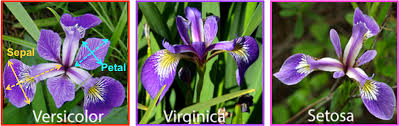

Vamos trabalhar com o popular conjunto de dados Iris junto com o scikit-learn, que é comumente analisado com classificação e agrupamento (*clustering*). Embora este conjunto de dados seja rotulado, vamos ignorar esses rótulos aqui para demonstrar o agrupamento. Em seguida, usaremos os rótulos para determinar o quão bem o algoritmo k-means agrupou as amostras.

O conjunto de dados Iris é conhecido como “conjunto de dados de brinquedo” porque possui apenas 150 amostras e quatro atributos. 

O conjunto de dados descreve 50 amostras para cada uma das três espécies de flores de íris - *Iris setosa*, *Iris versicolor* e *Iris virginica*.

As características de cada amostra são o comprimento e largura da sépala e comprimento e largura da pétala, todos medidos em centímetros. As sépalas são as partes externas maiores de cada flor que protegem as pétalas internas menores antes que os botões das flores desabrochem.

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** Cada agrupamento de amostras é agrupado em torno de um `centróide` - o ponto central do agrupamento.

**2. _(V ou F)_** O algoritmo de agrupamento *k-means* estuda o conjunto de dados e determina automaticamente o número apropriado de grupos (*clusters*). **F**

 <font color = "808080">
Respostas: 

**1** - Centróide

**2**- Falso

 </font>

### <font color = "000080">1. Carregando o conjunto de dados </font>

**Adicionar `%matplotlib inline` para permitir uso de Matplotlib neste *notebook*.**

In [ ]:
# Adicionar %matplotlib inline:
%matplotlib inline

In [ ]:
# Importar do módulo sklearn.datasets a função load_iris
from sklearn.datasets import load_iris

In [ ]:
# Use a função load_iris do módulo sklearn.datasets para obter
# um objeto Bunch contendo o conjunto de dados:
iris = load_iris()

O atributo DESCR indica que existem 150 amostras (*Number of Instances*), cada uma com quatro atributos (*Number of Attributes*). Não há valores ausentes neste conjunto de dados. O conjunto de dados classifica as amostras rotulando-as com os inteiros 0, 1 e 2, representando *Iris setosa*, *Iris versicolor* e *Iris virginica*, respectivamente. Iremos ignorar os rótulos e permitir que o algoritmo de agrupamento *k-means* tente determinar as classes das amostras.

In [ ]:
# Complete com o atributo
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### <font color = "000080">Verificando o número de amostras, atributos e objetivos (*targets*)</font>

Você pode confirmar o número de amostras e atributos por amostra por meio do atributo *shape* do array de dados. O mesmo pode ser feito para o array de objetivos (*target*).

In [ ]:
# Complete o código com o atributo para a forma do conjunto de dados
iris.data.shape

(150, 4)

In [ ]:
# Complete o código com o atributo para a forma do conjunto de dados
iris.target.shape

(150,)

In [ ]:
# Verifique os rótulos numéricos do conjunto de dados com o atributo target_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Verifique os nomes das colunas do conjunto de dados com o atributo feature_names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## <font color = "000080">2 Explorando o conjunto de dados Iris: estatística descritiva com *Pandas*</font>

In [ ]:
# Importe a biblioteca pandas como usual
import pandas as pd

In [ ]:
# Configure o número de colunas a exibir
pd.set_option('max_columns', 5)

In [ ]:
# Largura de caracteres automática
pd.set_option('display.width', None)

In [ ]:
# Crie um DataFrame contendo o conteúdo do array 
# usando o conteúdo de feature_names como os nomes das colunas
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
# Adicione uma coluna contendo o nome de cada espécie de amostra
# A compreensão da lista no seguinte trecho usa cada valor no vetor target
# para procurar o nome da espécie correspondente em target_names
iris_df['especies'] = [iris.target_names[i] for i in iris.target]

In [ ]:
# Verifique o conteúdo do DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Vamos calcular algumas estatísticas descritivas para as colunas numéricas:

In [ ]:
# Número de casas decimais
pd.set_option('precision', 4)

In [ ]:
# Exibir as estatísticas básicas com describe()
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0573,3.7580,1.1993
std,0.8281,0.4359,1.7653,0.7622
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


In [ ]:
# Verifique apenas a coluna "especies" com o método describe()
iris_df['especies'].describe()

count        150
unique         3
top       setosa
freq          50
Name: especies, dtype: object

Chamar o método *describe()* na coluna **'especies'** confirma que ela contém três valores únicos. Aqui, sabemos com antecedência ao trabalhar com esses dados que existem três classes às quais as amostras pertencem, embora nem sempre seja o caso no aprendizado de máquina não supervisionado.

## <font color = "000080">3 Visualizando o conjunto de dados com a função `pairplot` de *Seaborn* </font>

Vamos visualizar os atributos deste conjunto de dados. Uma maneira de aprender mais sobre seus dados é ver como os atributos se relacionam uns com os outros. O conjunto de dados possui quatro atributos. Não é possível representar graficamente um atributo versus os outros três em um único gráfico. No entanto, pode-se plotar pares de atributos.

Utilize a função *pairplot* de *Seaborn* para criar uma grade de gráficos e plotar cada atributo entre outros atributos especificados.

In [ ]:
import seaborn as sns

In [ ]:
sns.set(font_scale=1.1)

In [ ]:
sns.set_style('whitegrid')

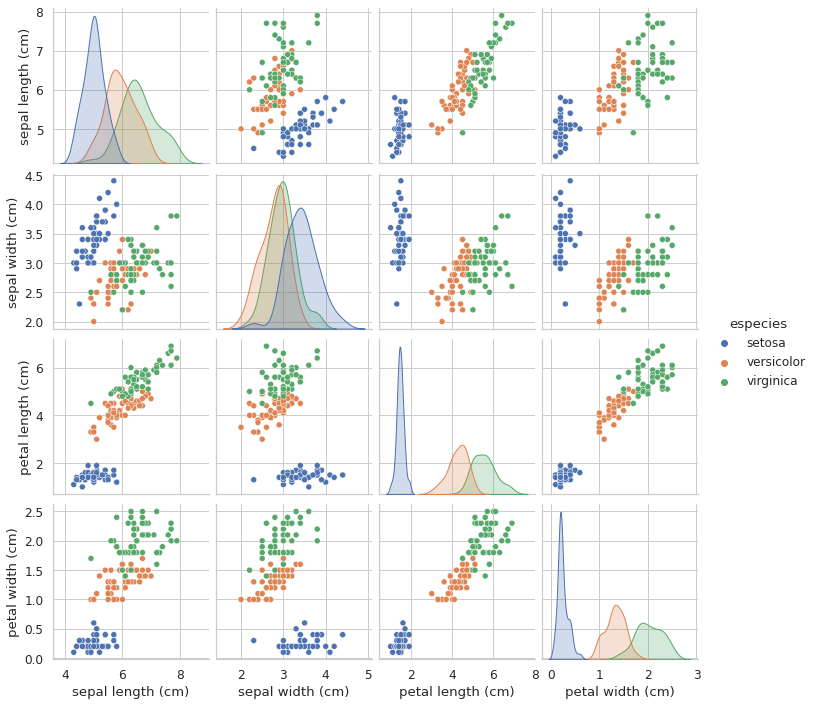

In [ ]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],
     hue='especies')

Onde tem-se:
- *data*: *DataFrame* contendo os dados a serem plotados.
- *vars*: Uma sequência contendo os nomes das variáveis a serem plotadas. Para um *DataFrame*, esses são os nomes das colunas a serem plotadas. Aqui, usamos as primeiras quatro colunas do *DataFrame*, representando o comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala, respectivamente.
- *hue*: A coluna do DataFrame que é usada para determinar as cores dos dados plotados. Neste caso, iremos colorir os dados com base em "especies".

## <font color = "000080">Questões</font>

O que representam os gráficos da diagonal principal? Observe as cores. O que significam? E o restante dos gráficos, de dispersão, o que representam?

- Gráfico de distribuição e de dispersão, ele avalia a distribuição

### <font color = "000080">Exibindo o gráfico tipo `pairplot` em uma cor</font>

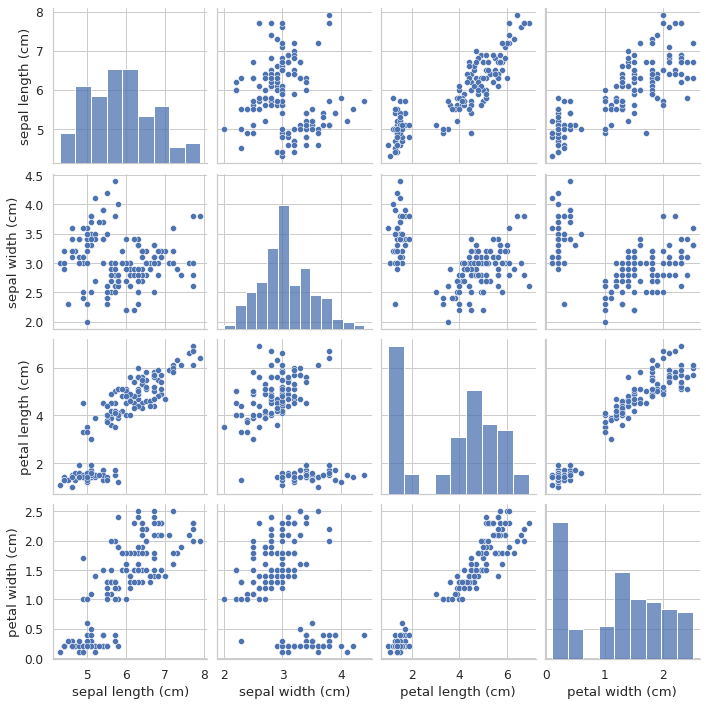

In [ ]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** A função `pairplot` de Seaborn cria uma grade de gráficos de dispersão confrontando os atributos.

**2. _(V ou F)_** Um gráfico da distribuição de um atributo mostra o intervalo de valores do atributo (da esquerda para a direita) e o número de amostras com esses valores (de cima para baixo). V

<font color = "808080">
Respostas: 

1 - pairplot

2 - V


</font>

## <font color = "000080">4. Usando um modelo `KMeans` </font>
### <font color = "000080">Criando o modelo</font>

In [ ]:
# Importar o estimador KMeans do módulo sklearn.cluster
from sklearn.cluster import KMeans

In [ ]:
# Criar o objeto com três clusters
kmeans = KMeans(n_clusters= 3 , random_state=11)

### <font color = "000080">Ajustando o modelo</font>

In [ ]:
# Treinar o estimador com fit
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=11)

Mais detalhes sobre os argumentos acima:
[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Quando o treinamento é concluído, o objeto `KMeans` contém:
- Um *array* nomeado labels_ com valores de 0 a *n_clusters* - 1 (neste exemplo, 0 a 2), indicando os *clusters* aos quais as amostras pertencem;
- Um *array* nomeado *cluster_centers_* em que cada linha representa um centróide.

### <font color = "000080">Comparando os rótulos com os valores-alvo do conjunto de dados da Íris</font>

Como o conjunto de dados Íris é rotulado, podemos olhar os valores do *array target* para ter uma noção de quão bem o algoritmo *k-means* agrupou as amostras para as três espécies de Íris. Com dados não rotulados, é preciso um especialista no domínio para ajudar a avaliar se as classes previstas fazem pelo algoritmo fazem sentido.

Neste conjunto de dados, as primeiras 50 amostras são *Iris setosa*, as próximas 50 são *Iris versicolor* e as últimas 50 são *Iris virginica*. 
O vetor *target* do conjunto de dados Íris as representa com os valores 0, 1 e 2. Se o estimador `KMeans` escolheu os *clusters* perfeitamente, então cada grupo de 50 elementos no vetor *labels_* do estimador deve ter um rótulo distinto. <p>Conforme você analisa os resultados abaixo, observe que o estimador `KMeans` usa os valores de **0** a **k - 1** para rotular os *clusters*, mas eles não estão relacionados ao vetor *target* do conjunto de dados Íris.

In [ ]:
# Mostrar que as primeiras 50 amostras foram todas colocadas no cluster 1
print(kmeans.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Mostrar que as próximas 50 amostras foram colocadas no cluster 0
# Observe que duas amostras foram posicionadas no cluster 2
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Mostrar que as 50 amostras restantes foram colocadas no cluster 2
# Observe que quatorze amostras foram posicionadas no cluster 0
print(kmeans.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


Os resultados dos três códigos acima confirmam o que vimos nos diagramas do *pairplot* no início desta seção: que *Iris setosa* está "em uma classe por si só" e que há alguma confusão entre *Iris versicolor* e *Iris virginica*.

## <font color = "000080">Autoavaliação</font>

**1. _(IPython Session)_** Experimente utilizar o *k-means* no conjunto de dados Íris com dois *clusters* e, em seguida, exiba os primeiros 50 e os últimos 100 elementos do *array* `labels_` do modelo.

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=11)

In [ ]:
# Treinamento do algoritmo com 2 grupos; 300 iterações
kmeans2.fit(iris.data)

KMeans(n_clusters=2, random_state=11)

In [ ]:
print(kmeans2.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print(kmeans2.labels_[50:150])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## <font color = "000080">5 Redução de dimensionalidade com análise de componentes principais</font>
### <font color = "000080">Criando o objeto PCA</font>

A seguir, usaremos o estimador `PCA` (do módulo *sklearn.decomposition*) para realizar a redução de dimensionalidade.
Este estimador usa um algoritmo chamado análise de componente principal para analisar os atributos de um conjunto de dados e reduzí-los ao número especificado de dimensões.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# O estimador PCA usa o argumento n_components para especificar o número de dimensões:
pca = PCA(n_components=2, random_state=11)

### <font color = "000080">Transformando os atributos do conjunto de dados Íris em duas dimensões</font>

In [ ]:
# Vamos treinar o estimador e produzir os dados reduzidos chamando os métodos
# fit e transform do estimador PCA:
pca.fit(iris.data)

PCA(n_components=2, random_state=11)

In [ ]:
# Aplicar a redução de dimensionalidade à entrada com a função transform
iris_pca = pca.transform(iris.data)

Quando o método completa sua tarefa, ele retorna um *array* com o mesmo número de linhas que `iris.data`, mas apenas duas colunas. Vamos confirmar isso verificando a forma de `iris_pca`.

In [ ]:
iris_pca.shape

(150, 2)

Feito isso, vamos reutilizar o estimador treinado (produzido com *fit*) para realizar uma segunda transformação para reduzir os centróides do *cluster* de quatro dimensões para duas. Isso nos permitirá traçar o gráfico com as localizações dos centróides em cada *cluster*.

### <font color = "000080">Visualizando os dados reduzidos</font>

Agora que reduzimos o conjunto de dados original a apenas duas dimensões, vamos usar um gráfico de dispersão para exibir os dados. Nesse caso, usaremos a função de gráfico de dispersão do `Seaborn`. Primeiro, vamos transformar os dados reduzidos em um `DataFrame` e adicionar uma coluna de espécies que usaremos para determinar as cores dos pontos.

In [ ]:
iris_pca_df = pd.DataFrame(iris_pca, 
                            columns=['Componente1', 'Componente2'])

In [ ]:
iris_pca_df['especies'] = iris_df.especies

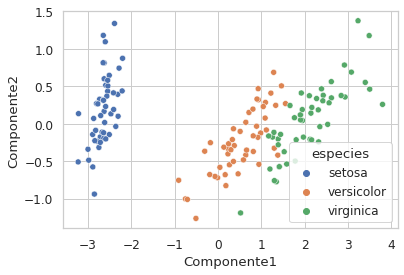

In [ ]:
# Plotar o gráfico de dispersão
eixos = sns.scatterplot(data=iris_pca_df, x='Componente1', 
     y='Componente2', hue='especies', legend='brief') 

Cada centróide no *array* *cluster_centers_* do objeto *KMeans* tem o mesmo número de atributos que o conjunto de dados original (quatro neste caso). Para plotar os centróides, devemos reduzir suas dimensões. Você pode pensar em um centróide como a amostra "média" em seu *cluster*. Portanto, cada centróide deve ser transformado usando o mesmo estimador `PCA` que usamos para reduzir as outras amostras nesse *cluster*.

In [ ]:
iris_centros = pca.transform(kmeans.cluster_centers_)


Agora, vamos representar graficamente os centróides dos três *clusters* como pontos pretos maiores. Em vez de transformar o *array iris_centers* em um `DataFrame` primeiro, vamos usar a função de dispersão do `Matplotlib` para plotar os três centróides.

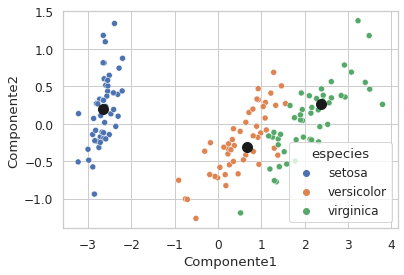

In [ ]:
# Plotar o gráfico de dispersão (no caso de células do jupyter-notebook)
eixos = sns.scatterplot(data=iris_pca_df, x='Componente1', 
     y='Componente2', hue='especies', legend='brief') 

import matplotlib.pyplot as plt

# Argumento s -> tamanho do ponto (no caso, 100)
# Argumento c -> cor do ponto (no caso, 'k')
pontos = plt.scatter(iris_centros[:,0], iris_centros[:,1], 
                    s=100, c='k')

## <font color = "000080">Autoavaliação</font>

**1. _(V ou F)_** Cada centróide em um array `cluster_centers_` de um objeto `KMeans` tem o mesmo número de atributos que o conjunto de dados original.

**2. _(Discussão)_** Qual é o objetivo da seguinte declaração?

```python
iris_centros = pca.transform(kmeans.cluster_centers_)
```

<font color = "808080">
Respostas: 

1 - Verdadeiro 

2 - O objetivo da declaração é reduzir as dimensões

 </font>

## <font color = "000080">6 Escolhendo o melhor estimador de *cluster*</font>

Vamos executar alguns algoritmos de agrupamento e ver como eles agrupam as três espécies de flores de Íris. Aqui, tentaremos agrupar as amostras do conjunto de dados Íris usando o objeto *kmeans* que criamos anteriormente e objetos dos estimadores `DBSCAN`, `MeanShift`, `SpectralClustering` e `AgglomerativeClustering` do `scikit-learn`.

In [ ]:
from sklearn.cluster import DBSCAN, MeanShift,\
     SpectralClustering, AgglomerativeClustering

In [ ]:
modelos = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

Cada iteração do seguinte *for*:
- Chama o método *fit* de um estimador com *iris.data* como um argumento,
- Em seguida, usa a função *unique* de `NumPy` para obter os rótulos e contagens do *cluster* para os três grupos de 50 amostras;
- E exibe os resultados. 

Veja que, para os estimadores **DBSCAN** e **MeanShift**, não especificamos o número de *clusters* com antecedência

Curiosamente, o **DBSCAN** previu corretamente três *clusters*(rotulados -1, 0 e 1), embora tenha colocado 84 das 100 amostras de *Iris virginica* e *Iris versicolor* no mesmo *cluster*. 

O estimador **MeanShift**, por outro lado, previu apenas dois *clusters* (rotulados como 0 e 1) e colocou 99 das 100 amostras de *Iris virginica* e *Iris versicolor* no mesmo *cluster*.

In [ ]:
import numpy as np

In [ ]:
for nome, modelo in modelos.items():
     modelo.fit(iris.data)
     print(f'\n{nome}:')
     for i in range(0, 101, 50):
         rotulos, conts = np.unique(
             modelo.labels_[i:i+50], return_counts=True)
         print(f'{i}-{i+50}:')
         for rotulo, cont in zip(rotulos, conts):
             print(f'   rótulo = {rotulo}, cont = {cont}')
             


KMeans:
0-50:
   rótulo = 1, cont = 50
50-100:
   rótulo = 0, cont = 48
   rótulo = 2, cont = 2
100-150:
   rótulo = 0, cont = 14
   rótulo = 2, cont = 36

DBSCAN:
0-50:
   rótulo = -1, cont = 1
   rótulo = 0, cont = 49
50-100:
   rótulo = -1, cont = 6
   rótulo = 1, cont = 44
100-150:
   rótulo = -1, cont = 10
   rótulo = 1, cont = 40

MeanShift:
0-50:
   rótulo = 1, cont = 50
50-100:
   rótulo = 0, cont = 49
   rótulo = 1, cont = 1
100-150:
   rótulo = 0, cont = 50

SpectralClustering:
0-50:
   rótulo = 0, cont = 50
50-100:
   rótulo = 2, cont = 50
100-150:
   rótulo = 1, cont = 35
   rótulo = 2, cont = 15

AgglomerativeClustering:
0-50:
   rótulo = 1, cont = 50
50-100:
   rótulo = 0, cont = 49
   rótulo = 2, cont = 1
100-150:
   rótulo = 0, cont = 15
   rótulo = 2, cont = 35


Embora esses algoritmos rotulem cada amostra, os rótulos simplesmente indicam os *clusters*. O que você faz com as informações do *cluster* depois de obtê-las? Se seu objetivo é usar os dados no aprendizado de máquina supervisionado, normalmente você analisaria as amostras/observações em cada *cluster* para tentar determinar como elas estão relacionados e rotulá-las de acordo. 

O aprendizado não supervisionado é comumente usado em aplicativos de aprendizado profundo. Alguns exemplos de dados não rotulados processados ​​com aprendizagem não supervisionada incluem tweets do Twitter, postagens do Facebook, vídeos, fotos, artigos de notícias, avaliações de produtos de clientes, avaliações de filmes de espectadores e muito mais.

### <font color = "000080">Referências</font>

DEITEL, P. e DEITEL, H., Intro to Python for computer science and data science. Pearson, 2020.

In [ ]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################